In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

# Upload your Kaggle API key (kaggle.json) file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poralikha","key":"79169b3029d199799a5ee16330f777e3"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                 DAIGT V2 Train Dataset                               29MB  2023-11-16 01:38:36           1561        158  1.0              
muhammadbinimran/housing-price-prediction-data                  Housing Price Prediction Data                       763KB  2023-11-21 17:56:32           6972        124  1.0              
thedevastator/netflix-imdb-scores                               Netflix IMDB Scores                                 699KB  2023-12-03 14:10:34           2248         40  1.0              
thedevastator/spotify-tracks-genre-dataset                  

In [5]:
!kaggle datasets download -d heeraldedhia/groceries-dataset

  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 89.7MB/s]


In [6]:
!mkdir groceries

In [7]:
!unzip groceries-dataset.zip -d groceries

Archive:  groceries-dataset.zip
  inflating: groceries/Groceries_dataset.csv  


In [8]:
cd/content/groceries/

/content/groceries


In [ ]:
#Dataset_1 named by "Association Learning using Apriori and Fpgrowth"

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
df = pd.read_csv("Groceries_dataset.csv")

In [11]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df.groupby(['Member_number','Date']))]
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.001)

,support,itemsets
0,0.004010,(0)
1,0.021386,(1)
2,0.001470,(2)
3,0.001938,(3)
4,0.008087,(6)
...,...,...
745,0.001136,"(122, 164, 130)"
746,0.001002,"(122, 164, 138)"
747,0.001337,"(122, 164, 165)"
748,0.001069,"(130, 164, 138)"


In [15]:
apriori(df, min_support=0.001, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
745,0.001136,"(whole milk, rolls/buns, sausage)"
746,0.001002,"(whole milk, rolls/buns, soda)"
747,0.001337,"(whole milk, rolls/buns, yogurt)"
748,0.001069,"(whole milk, soda, sausage)"


In [16]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
...,...,...,...
745,0.001136,"(whole milk, rolls/buns, sausage)",3
746,0.001002,"(whole milk, rolls/buns, soda)",3
747,0.001337,"(whole milk, rolls/buns, yogurt)",3
748,0.001069,"(whole milk, soda, sausage)",3


In [17]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
5,0.001136,(bathroom cleaner),1
6,0.033950,(beef),1
7,0.021787,(berries),1
8,0.016574,(beverages),1
9,0.045312,(bottled beer),1


In [18]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'whole milk', 'rolls/buns'} ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
677,0.013968,"(whole milk, rolls/buns)",2


In [19]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.001)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.157923,(164)
1,0.085879,(165)
2,0.060349,(130)
3,0.009490,(132)
4,0.051728,(105)
...,...,...
745,0.001403,"(26, 165)"
746,0.001069,"(26, 102)"
747,0.001002,"(26, 138)"
748,0.001069,"(104, 164)"


In [20]:
fpgrowth(df, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.051728,(pastry)
4,0.018780,(salty snack)
...,...,...
64,0.011161,"(whole milk, yogurt)"
65,0.011629,"(whole milk, soda)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.010559,"(other vegetables, rolls/buns)"


In [21]:
import pandas as pd
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
%timeit -n 100 -r 10 apriori(df, min_support=0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.49 ms ± 56.6 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [23]:
%timeit -n 100 -r 10 fpgrowth(df, min_support=0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


52.8 ms ± 9.03 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [ ]:
#Solution Code of dataset_1

In [53]:
# Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# Load the dataset
df = pd.read_csv("Groceries_dataset.csv")

# Extract transactions
transactions = [a[1]['itemDescription'].tolist() for a in list(df.groupby(['Member_number', 'Date']))]

# Perform one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.001, use_colnames=True)
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))

# Display frequent itemsets with Apriori
print("Frequent Itemsets with Apriori:")
print(frequent_itemsets_apriori.head(10))

# FP-growth
frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)

# Display frequent itemsets with FP-growth
print("\nFrequent Itemsets with FP-growth:")
print(frequent_itemsets_fpgrowth.head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets with Apriori:
    support                 itemsets  length
0  0.004010  (Instant food products)       1
1  0.021386               (UHT-milk)       1
2  0.001470       (abrasive cleaner)       1
3  0.001938       (artif. sweetener)       1
4  0.008087          (baking powder)       1
5  0.001136       (bathroom cleaner)       1
6  0.033950                   (beef)       1
7  0.021787                (berries)       1
8  0.016574              (beverages)       1
9  0.045312           (bottled beer)       1

Frequent Itemsets with FP-growth:
    support               itemsets
0  0.157923           (whole milk)
1  0.085879               (yogurt)
2  0.060349              (sausage)
3  0.009490  (semi-finished bread)
4  0.051728               (pastry)
5  0.018780          (salty snack)
6  0.046916          (canned beer)
7  0.015772      (misc. beverages)
8  0.013700     (hygiene articles)
9  0.097106                 (soda)


In [ ]:
#Dataset_2 named by "Compare Apriori vs Fp_growth PTIT"

In [27]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
groceries = pd.read_csv("Groceries_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
groceries.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

In [30]:
groceries.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [31]:
# Get all the transactions as a list of lists
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# First 21st transactions in the transactional dataset
len(all_transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14963

In [33]:
# Look at the 10 first transactions
all_transactions[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [34]:
# The following instructions transform the dataset into the required format
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
trans_encoder_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
frequent_itemsets = fpgrowth(trans_encoder_matrix, min_support=0.001, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
745,0.001403,"(chewing gum, yogurt)"
746,0.001069,"(other vegetables, chewing gum)"
747,0.001002,"(chewing gum, soda)"
748,0.001069,"(whole milk, pasta)"


In [38]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.02)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
2,(soda),(yogurt),0.097106,0.085879,0.005814,0.059876,0.697219,-0.002525,0.972342,-0.324769
3,(yogurt),(soda),0.085879,0.097106,0.005814,0.067704,0.697219,-0.002525,0.968463,-0.322065
4,(other vegetables),(yogurt),0.122101,0.085879,0.008087,0.066229,0.771192,-0.002399,0.978957,-0.252593
...,...,...,...,...,...,...,...,...,...,...
994,(chewing gum),(yogurt),0.012030,0.085879,0.001403,0.116667,1.358508,0.000370,1.034855,0.267112
995,(chewing gum),(other vegetables),0.012030,0.122101,0.001069,0.088889,0.727994,-0.000400,0.963547,-0.274409
996,(chewing gum),(soda),0.012030,0.097106,0.001002,0.083333,0.858167,-0.000166,0.984975,-0.143312
997,(pasta),(whole milk),0.008087,0.157923,0.001069,0.132231,0.837316,-0.000208,0.970394,-0.163793


In [40]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):

    start_time = 0
    total_execution = 0

    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix,
                       min_support=min_support,
                       use_colnames=True, low_memory=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")

    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix,
                       min_support=min_support,
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")

    return total_execution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
n_range = range(1, 10, 1)
list_time_ap = []
list_time_fp = []
for n in n_range:
    time_ap = 0
    time_fp = 0
    min_sup = float(n/100)
    time_ap = perform_rule_calculation(trans_encoder_matrix, rule_type="fpgrowth", min_support=min_sup)
    time_fp = perform_rule_calculation(trans_encoder_matrix, rule_type="aprior", min_support=min_sup)
    list_time_ap.append(time_ap)
    list_time_fp.append(time_fp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!


In [42]:
list_time_ap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.4183669090270996,
 0.4201979637145996,
 0.6214795112609863,
 0.22769904136657715,
 0.13075590133666992,
 0.13388895988464355,
 0.10901236534118652,
 0.11407756805419922,
 0.10552763938903809]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


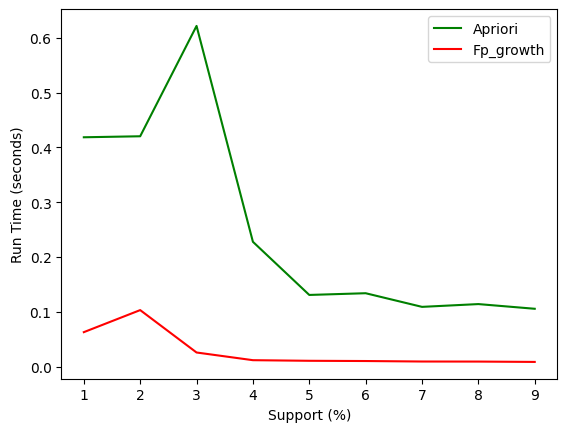

In [43]:
import matplotlib.pyplot as plt

plt.plot(n_range, list_time_ap, label='Apriori', color='green')
plt.plot(n_range, list_time_fp, label='Fp_growth', color='red')
plt.xlabel("Support (%)")
plt.ylabel("Run Time (seconds)")
plt.legend(loc="best")
plt.show()

In [ ]:
#Solution Code of dataset_2

In [44]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# Load the dataset
groceries = pd.read_csv("Groceries_dataset.csv")

# Get all the transactions as a list of lists
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# The following instructions transform the dataset into the required format
trans_encoder = TransactionEncoder()  # Instantiate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    start_time = 0
    total_execution = 0

    if not rule_type == "fpgrowth":
        start_time = time.time()
        rule_items = apriori(transact_items_matrix,
                             min_support=min_support,
                             use_colnames=True, low_memory=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")

    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix,
                              min_support=min_support,
                              use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")

    return total_execution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
n_range = range(1, 10, 1)
list_time_ap = []
list_time_fp = []

for n in n_range:
    time_ap = 0
    time_fp = 0
    min_sup = float(n / 100)
    time_ap = perform_rule_calculation(trans_encoder_matrix, rule_type="fpgrowth", min_support=min_sup)
    time_fp = perform_rule_calculation(trans_encoder_matrix, rule_type="aprior", min_support=min_sup)
    list_time_ap.append(time_ap)
    list_time_fp.append(time_fp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!
Computed Fp Growth!
Computed Apriori!


In [49]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


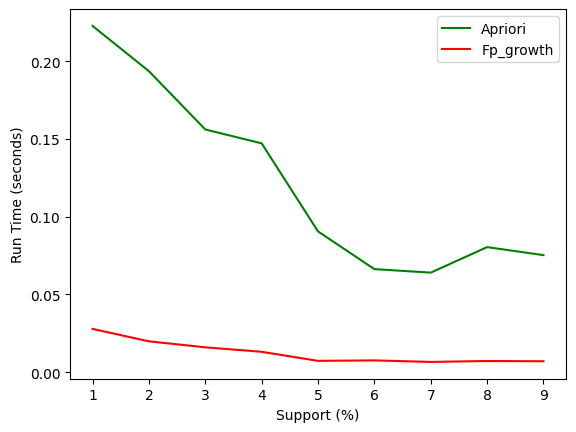

In [50]:
plt.plot(n_range, list_time_ap, label='Apriori', color='green')
plt.plot(n_range, list_time_fp, label='Fp_growth', color='red')
plt.xlabel("Support (%)")
plt.ylabel("Run Time (seconds)")
plt.legend(loc="best")
plt.show()